In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.sparse import hstack

# Understanding Data

In [2]:
df = pd.read_csv("Movie Success Rate Prediction Dataset/movie_success_rate.csv")

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.81432,193230.2518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(839, 33)

In [6]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [8]:
df.isnull().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [9]:
# Genre counts
df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

In [10]:
# Directors
df['Director'].value_counts()

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64

In [11]:
# Actors
df['Actors'].value_counts()

Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris                      1
Chloë Grace Moretz, Matthew Zuk, Gabriela Lopez,Bailey Anne Borders    1
Olivia DeJonge, Ed Oxenbould, Deanna Dunagan, Peter McRobbie           1
Vin Diesel, Paul Walker, Dwayne Johnson, Jordana Brewster              1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: Actors, Length: 834, dtype: int64

# Data Visualizing

<AxesSubplot:>

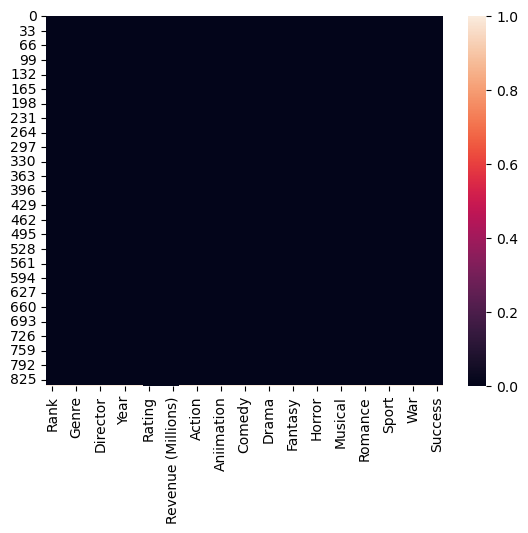

In [12]:
sns.heatmap(df.isnull())

In [13]:
df = df.fillna(df.median())

C:\Users\nwahi\AppData\Local\Temp\ipykernel_3588\3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [14]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [15]:
x = df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = df['Success']

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y)

In [17]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = log.predict(x_test)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(y_pred)

Precision: 0.7857142857142857
Recall: 0.7333333333333333
F1 Score: 0.7586206896551724
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
clf = confusion_matrix(y_test,log.predict(x_test))

<AxesSubplot:>

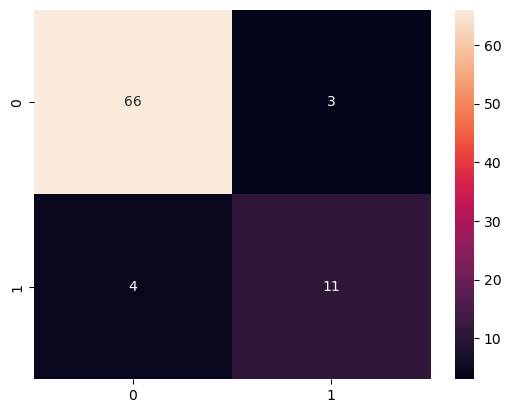

In [20]:
sns.heatmap(clf,annot=True)

In [21]:
x_train_opt = x_train.copy()
x_test_opt = x_test.copy()

In [22]:
kn = KNeighborsClassifier(n_neighbors=40)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [23]:
kn.score(x_test,y_test)

C:\Users\nwahi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8809523809523809

In [24]:
y_pred_kn = kn.predict(x_test)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_kn, average='binary')  # Change 'binary' to 'macro' or 'micro' if multi-class
recall = recall_score(y_test, y_pred_kn, average='binary')
f1 = f1_score(y_test, y_pred_kn, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7777777777777778
Recall: 0.4666666666666667
F1 Score: 0.5833333333333334


C:\Users\nwahi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

1.0

In [26]:
tree.score(x_train,y_train)

1.0

In [27]:
y_pred_tree = log.predict(x_test)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_tree, average='binary')  # Change 'binary' to 'macro' or 'micro' if multi-class
recall = recall_score(y_test, y_pred_tree, average='binary')
f1 = f1_score(y_test, y_pred_tree, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7857142857142857
Recall: 0.7333333333333333
F1 Score: 0.7586206896551724


In [28]:
clf = confusion_matrix(y_test,tree.predict(x_test))

In [29]:
clf

array([[69,  0],
       [ 0, 15]], dtype=int64)

<AxesSubplot:>

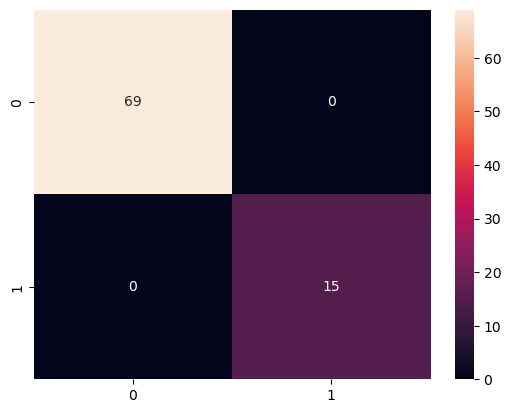

In [30]:
sns.heatmap(clf,annot=True)

In [31]:
x

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2014.0,121.0,8.10000,757074.0000,333.130000,76.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2012.0,124.0,7.00000,485820.0000,126.460000,65.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016.0,117.0,7.30000,157606.0000,138.120000,62.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2016.0,108.0,7.20000,60545.0000,270.320000,59.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,123.0,6.20000,393727.0000,325.020000,40.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2012.0,88.0,6.70000,164088.0000,54.720000,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,2007.0,94.0,5.50000,73152.0000,17.540000,46.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,2008.0,98.0,6.20000,70699.0000,58.010000,50.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
837,2016.0,87.0,5.30000,12435.0000,19.640000,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
834    0.0
835    0.0
836    0.0
837    0.0
838    0.0
Name: Success, Length: 839, dtype: float64

In [33]:
import pandas as pd

# Create the testing dataset
data = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10],
    "Title": [
        "Guardians of the Galaxy Vol. 3",
        "Prometheus II",
        "Split II",
        "Sing II",
        "Suicide Squad II",
        "The Next Superhero",
        "Love in Space",
        "The Time Traveler's Diary",
        "The Grand Adventure",
        "Heroes of Tomorrow"
    ],
    "Genre": [
        "Action,Adventure,Sci-Fi",
        "Adventure,Mystery,Sci-Fi",
        "Horror,Thriller",
        "Animation,Comedy,Family",
        "Action,Adventure,Fantasy",
        "Action,Adventure,Fantasy",
        "Romance,Sci-Fi",
        "Adventure,Sci-Fi",
        "Animation,Comedy",
        "Action,Drama,Sci-Fi"
    ],
    "Description": [
        "The Guardians must fight a new threat.",
        "A sequel exploring the origins of mankind.",
        "The return of the kidnapper with new personalities.",
        "A new singing competition brings unexpected challenges.",
        "The squad is back for another dangerous mission.",
        "A young man discovers he has superpowers and must save the world from an impending alien invasion.",
        "Two astronauts on a mission to Mars discover love in the unlikeliest of places: outer space.",
        "A young woman discovers a diary that allows her to travel through time and change her past.",
        "A group of animated characters set out on a grand adventure to save their world from an evil sorcerer.",
        "In a dystopian future, a group of rebels fights against a corrupt government to restore peace and freedom."
    ],
    "Director": [
        "James Gunn",
        "Ridley Scott",
        "M. Night Shyamalan",
        "Christophe Lourdelet",
        "David Ayer",
        "John Doe",
        "Jane Smith",
        "Mark Lee",
        "Alice Johnson",
        "Michael Bay"
    ],
    "Actors": [
        "Chris Pratt, Vin Diesel, Zoe Saldana",
        "Noomi Rapace, Michael Fassbender",
        "James McAvoy, Anya Taylor-Joy",
        "Matthew McConaughey, Reese Witherspoon",
        "Will Smith, Margot Robbie",
        "Chris Hemsworth, Scarlett Johansson",
        "Emma Stone, Tom Holland",
        "Zendaya, Jacob Elordi",
        "Voices of Dwayne Johnson, Kristen Bell",
        "Henry Cavill, Charlize Theron"
    ],
    "Year": [2025, 2025, 2025, 2025, 2025, 2025, 2026, 2024, 2025, 2026],
    "Runtime (Minutes)": [130, 115, 120, 125, 115, 130, 115, 125, 100, 140],
    "Rating": [8.5, 7.9, 8.1, 7.5, 8.2, 8.5, 8.0, 8.2, 7.5, 9.0],
    "Votes": [200000, 150000, 80000, 50000, 60000, 250000, 150000, 180000, 120000, 300000],
    "Revenue (Millions)": [400.00, 250.00, 150.00, 50.00, 80.00, 600, 200, 350, 250, 700],
    "Metascore": [85, 78, 82, 74, 80, 85, 90, 78, 75, 92],
    "Action": [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    "Adventure": [1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    "Aniimation": [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    "Biography": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Comedy": [0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
    "Crime": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Drama": [1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
    "Family": [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    "Fantasy": [1, 1, 0, 0, 0, 1, 1, 0, 0, 1],
    "History": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Horror": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Music": [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    "Musical": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Mystery": [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    "Romance": [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "Sci-Fi": [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    "Sport": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
    "Thriller": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "War": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Western": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Success": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Placeholder for success (0 for not released)
}

# Create a DataFrame
test_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
test_df.to_csv("unreleased_movies.csv", index=False)

print("Dataset saved as 'unreleased_movies.csv'.")


Dataset saved as 'unreleased_movies.csv'.


In [34]:
# Load the unreleased movies dataset
test_df = pd.read_csv("unreleased_movies.csv")

In [35]:
# Fill missing values
test_df = test_df.fillna(test_df.median())

# Select the same features as used in training
features = [
    'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 
    'Revenue (Millions)', 'Metascore', 
    'Action', 'Adventure', 'Aniimation', 'Biography', 
    'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 
    'History', 'Horror', 'Music', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
    'Thriller', 'War', 'Western'
]

# Prepare input data for prediction
X_test = test_df[features]


C:\Users\nwahi\AppData\Local\Temp\ipykernel_3588\1395333907.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df = test_df.fillna(test_df.median())


In [36]:
# Load the original dataset used for training
df = pd.read_csv("Movie Success Rate Prediction Dataset/movie_success_rate.csv")
df = df.fillna(df.median())  # Fill missing values again

# Prepare training data
X = df[features]
y = df['Success']

# Split the data
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.1, stratify=y)

# Train the Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


C:\Users\nwahi\AppData\Local\Temp\ipykernel_3588\1645169155.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())  # Fill missing values again


DecisionTreeClassifier()

In [37]:
# Make predictions
predictions = tree.predict(X_test)

# Add predictions to the test DataFrame
test_df['Predicted Success'] = predictions

# Print the predictions
print(test_df[['Title', 'Predicted Success']])


                            Title  Predicted Success
0  Guardians of the Galaxy Vol. 3                0.0
1                   Prometheus II                0.0
2                        Split II                0.0
3                         Sing II                0.0
4                Suicide Squad II                0.0
5              The Next Superhero                1.0
6                   Love in Space                0.0
7       The Time Traveler's Diary                0.0
8             The Grand Adventure                0.0
9              Heroes of Tomorrow                1.0


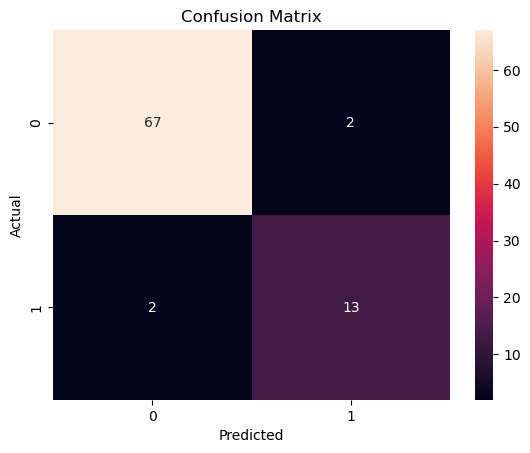

In [38]:
# If you want to visualize the confusion matrix for the original test predictions
clf = confusion_matrix(y_test_full, tree.predict(X_test_full))
sns.heatmap(clf, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()